In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Parameter
from qiskit_ibm_runtime import SamplerV2, QiskitRuntimeService
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
service= QiskitRuntimeService(channel="ibm_quantum")
backend= service.backend("ibm_sherbrooke")

t= Parameter("time") # time acts as the parameter of the circuit
J= 1.0 # The coupling constant is assumed to be equal to 1

# Create a parametric quantum circuit
circuit = QuantumCircuit(3)
circuit.x(0)  # The Initial state of the qubit is set to be |100⟩
circuit.rxx(2*J*t, 0, 1)
circuit.ryy(2*J*t, 0, 1)
circuit.rzz(2*J*t, 0, 1)
circuit.rxx(2*J*t, 1, 2)
circuit.ryy(2*J*t, 1, 2)
circuit.rzz(2*J*t, 1, 2)
circuit.measure_all()

circuit= transpile(circuit, backend)

parametric_values= np.linspace(0, np.pi/2, 25)

# Create pub list with transpiled circuit and the parameter values
pubs= [(circuit, [float(x)]) for x in parametric_values]

# Run the circuits using the Sampler primitive
sampler= SamplerV2(backend)
job= sampler.run(pubs, shots=1024)
result= job.result()

C:\Users\antra\AppData\Local\Temp\ipykernel_9600\1190966221.py:1: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service= QiskitRuntimeService(channel="ibm_quantum")
c:\Users\antra\AppData\Local\Programs\Python\Python313\Lib\site-packages\qiskit_ibm_runtime\qiskit_runtime_service.py:1111: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


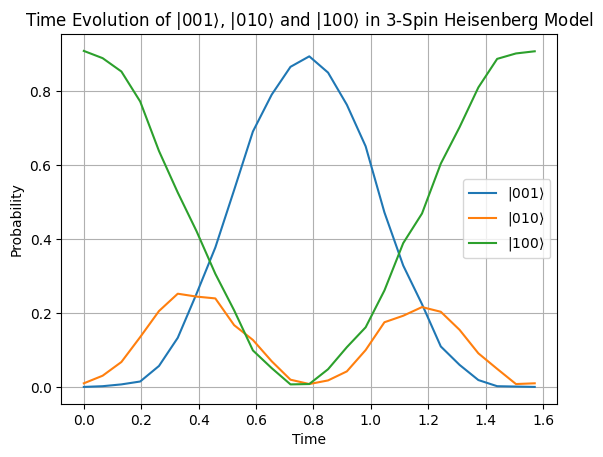

In [3]:
from collections import Counter
import matplotlib.pyplot as plt

prob_array_001= []
prob_array_010= []
prob_array_100= []

for i in range(len(parametric_values)): # Calculate the probabilities of finding the system in the state |001>, |010> or |100> at a specific time 't'
    meas_array= result[i].data.meas.array.flatten()
    counts= Counter(meas_array)
    total= sum(counts.values())
    
    p_001= counts.get(4, 0)/ total # 4 corresponds to |001⟩
    p_010= counts.get(2, 0)/ total # 2 corresponds to |010⟩
    p_100= counts.get(1, 0)/ total # 1 corresponds to |100⟩
    
    prob_array_001.append(p_001)
    prob_array_010.append(p_010)
    prob_array_100.append(p_100)

plt.plot(parametric_values, prob_array_001, label=r'$|001\rangle$')
plt.plot(parametric_values, prob_array_010, label=r'$|010\rangle$')
plt.plot(parametric_values, prob_array_100, label=r'$|100\rangle$')
plt.xlabel("Time")
plt.ylabel("Probability")
plt.title(r"Time Evolution of $|001\rangle$, $|010\rangle$ and $|100\rangle$ in 3-Spin Heisenberg Model")
plt.legend()
plt.grid(True)
plt.show()